<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/OSA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1071]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


In [1072]:
# !apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
# !apt install cm-super

In [1073]:
# plt.rcParams['text.usetex'] = True

**Reading the data**

In [1074]:
# Importing the datasets
df     = pd.read_csv('OSA_Data_April_2023_1.csv')

**Display the data**

In [1075]:
df.shape

(1000, 8)

**Display sample data**

In [1076]:
df.head()

,Age,Sex,Height,Weight,BMI,Neck,MF,OSA
0,49,0,66.0,127,0,0,0,0
1,42,0,66.0,165,0,0,0,0
2,58,1,68.0,138,0,0,0,0
3,44,0,60.0,118,0,0,0,0
4,55,0,64.0,136,0,0,0,0


In [1077]:
# df.sample(n = 10)

In [1078]:
# Drop the first column
# df = df.drop('OSA', axis = 1)

In [1079]:
# Drop rows with any NaN values
df = df.dropna()

In [1080]:
# df = df.drop(['AHI','OSA'], axis = 1)

In [1081]:
df.sample(n = 10)

,Age,Sex,Height,Weight,BMI,Neck,MF,OSA
19,49,0,73.0,200,0,0,0,0
36,55,0,62.0,173,1,0,0,0
887,46,1,72.0,300,1,1,1,1
236,50,0,62.0,284,1,1,0,0
962,52,0,60.0,254,1,1,0,1
719,40,1,75.0,208,0,1,0,1
40,61,0,64.0,189,1,1,0,0
683,67,0,63.0,204,1,1,1,1
251,49,0,66.0,170,0,0,1,0
560,52,1,69.0,216,1,1,0,1


In [1082]:
ones_count = df['OSA'].value_counts()[1]
print(ones_count)

565


In [1083]:
zeros_count = (df['OSA'] == 0).sum()
print(zeros_count)

435


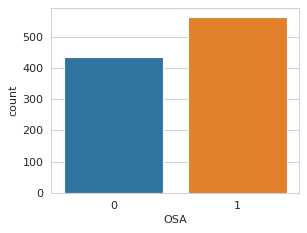

In [1084]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
fig = plt.figure(figsize=(4,3), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='OSA')
plt.savefig('classes.png')

In [1085]:
# from matplotlib import pyplot as plt

# fig, axes = plt.subplots(1,3,figsize=(8,3),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='OSA')
# sns.countplot(ax=axes[1],data=df, x='Sex')
# sns.countplot(ax=axes[2],data=df, x='BMI')
# plt.savefig('Statistics.png')


**Correlation between different variables**

In [1086]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='OSA', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['OSA'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 OSA       1
Neck      2
Weight    3
BMI       4
Sex       5
MF        6
Height    7
Age       8
Name: OSA, dtype: int64


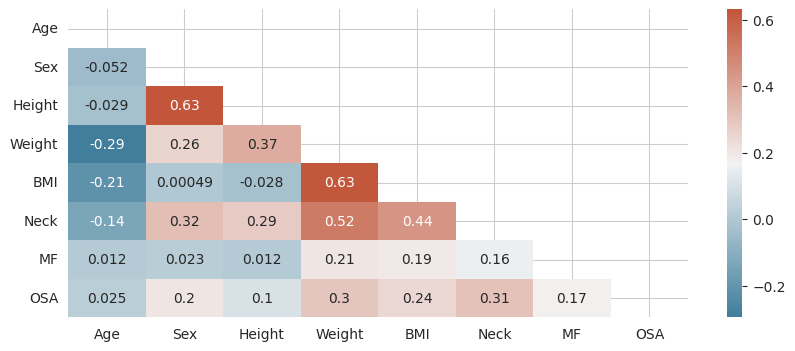

In [1087]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')

**Oversampling**

In [1088]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('OSA', axis=1)
y = df['OSA']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [1089]:
df.shape

(1130, 8)

In [1090]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the 
# # previous section, except the strategies impact the majority class 
# # instead of the minority class. For example, setting the sampling_strategy 
# # argument to “majority” will oversample the majority class determined 
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [1091]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [1092]:
# x_over.shape

In [1093]:
# X

**Preparing data for machine learning classifier**



In [1094]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['OSA'], axis=1), 
                                                    df['OSA'], 
                                                    test_size=0.25, 
                                                    random_state=42)

**Feature selection**

In [1095]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
selector  = SelectKBest(f_classif, k=7)
#======================================

x_train    = selector.fit_transform(X_train, Y_train)
x_test     = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [1096]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Neck', 'MF'], dtype='object')


In [1097]:
# sns.pairplot(df, vars=['Weight (lb)', 'BAN', 'AHI','OSA'])
# plt.savefig('Correction with OSA.png')

In [1098]:
X_train[selected_feature_names].head()

,Age,Sex,Height,Weight,BMI,Neck,MF
652,45,1,73.0,284,1,1,1
939,71,0,59.0,192,1,0,0
319,51,1,77.0,280,1,1,1
626,41,1,66.0,180,0,1,0
808,85,0,59.0,178,1,1,1


**Scaling the data**

In [1099]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [1100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):
 
    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(6,2),sharey=True)
    
    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 10})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=8)
    axs[0].set_xlabel('Predicted Labels',fontsize=8)
    axs[0].set_ylabel('True Labels',fontsize=8)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 10})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=8)
    axs[1].set_xlabel('Predicted Labels',fontsize=8)
    axs[1].set_ylabel('True Labels',fontsize=8)
    
    # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=11, y=1.05)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))

# Logistic Regression

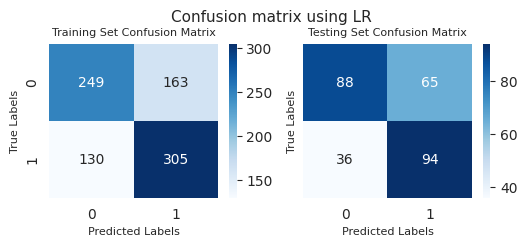

-----Results for LR ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.654073           0.651709        0.701149    0.675526          0.64311          0.591195       0.723077   0.650519


In [1101]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_train,y_pred_train)
auc1 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  

In [1102]:
# # Compute False postive rate, and True positive rate
# fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_pred_train)
# # Calculate Area under the curve to display on the plot
# auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

# Support Vector Machine

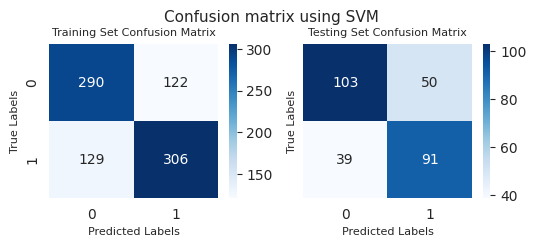

-----Results for SVM ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
         0.70366           0.714953        0.703448    0.709154         0.685512           0.64539            0.7   0.671587


In [1103]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)

calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_train,y_pred_train)
auc2 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)

In [1104]:
# # Compute False postive rate, and True positive rate
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_train)
# # Calculate Area under the curve to display on the plot
# auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

# Gradient Boosting Classifier

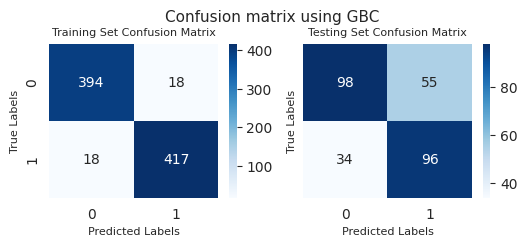

-----Results for GBC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.957497           0.958621        0.958621    0.958621         0.685512          0.635762       0.738462   0.683274


In [1105]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier(random_state=1)
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
# Create a grid search object with cross-validation
grid_search = GridSearchCV(GBC, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)
y_pred_train = grid_search.predict(x_train)
y_pred_test  = grid_search.predict(x_test)

# GBC = GradientBoostingClassifier()
# GBC.fit(x_train, y_train)
# y_pred_train = GBC.predict(x_train)
# y_pred_test  = GBC.predict(x_test)

calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_train,y_pred_train)
auc3 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)

In [1106]:
# # Compute False postive rate, and True positive rate
# fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_pred_train)
# # Calculate Area under the curve to display on the plot
# auc3 = metrics.roc_auc_score(y_train,y_pred_train)

# GaussianNB

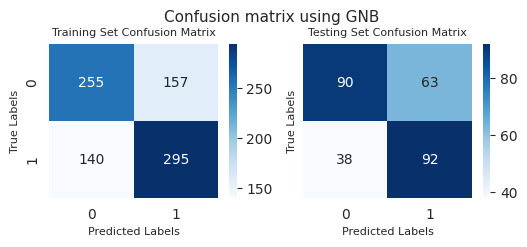

-----Results for GNB ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.649351           0.652655        0.678161    0.665163          0.64311          0.593548       0.707692   0.645614


In [1107]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_train,y_pred_train)
auc4 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(GNB,x_train, y_train)
results.append(cv_results)

In [1108]:
# # Compute False postive rate, and True positive rate
# fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, y_pred_train)
# # Calculate Area under the curve to display on the plot
# auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

# KNeighborsClassifier

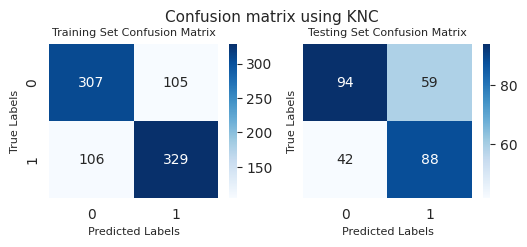

-----Results for KNC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.750885           0.758065        0.756322    0.757192          0.64311          0.598639       0.676923   0.635379


In [1109]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)

y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)

calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_train,y_pred_train)
auc5 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)

In [1110]:
# # Compute False postive rate, and True positive rate
# fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_pred_train)
# # Calculate Area under the curve to display on the plot
# auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

# Decision Tree

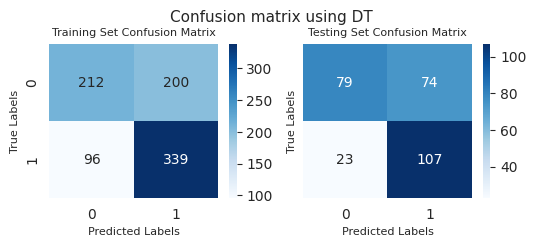

-----Results for DT ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.650531           0.628942         0.77931    0.696099         0.657244           0.59116       0.823077   0.688103


In [1111]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)

y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)

calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_train,y_pred_train)
au6 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(DT,x_train, y_train)
results.append(cv_results)

In [1112]:
# # Compute False postive rate, and True positive rate
# fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# # Calculate Area under the curve to display on the plot
# auc6 = metrics.roc_auc_score(y_train,y_pred_train)

In [1113]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, 
                           feature_names=selected_feature_names,  
                           class_names='OSA',  
                           filled=True, rounded=True,  
                           special_characters=True)

# Plot the decision tree using graphviz
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('Decision_Tree', view=False)

# graph.render("Decision_Tree", format="png")  # Save the tree to a file
graph.view()  # Open the tree visualization in a viewer


'Decision_Tree.png'

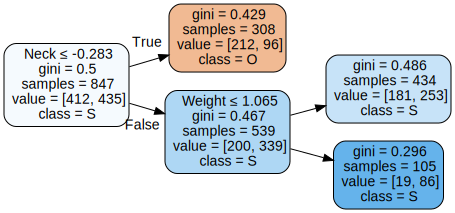

In [1114]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names='OSA', filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph

# Save the graph as a PNG file
# graph.format = 'png'
# graph.render('Decision_Tree')

# # Plot the decision tree
# fig, ax = plt.subplots(figsize=(8,8))
# plot_tree(DT, ax=ax)
# plt.savefig('Decision_Tree.png')
# plt.show()

In [1115]:
# Plotting the Decision Tree diagram
# from sklearn.tree import plot_tree
# plt.figure(figsize=(4,4))
# plot_tree(DT, filled=True, feature_names=selected_feature_names, class_names='OSA')
# plt.show()

# Random Forest Classifier

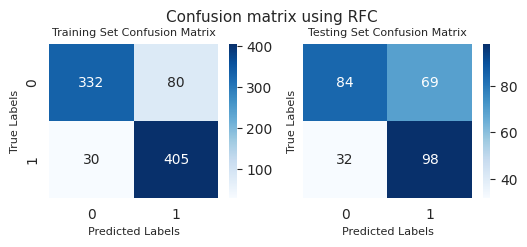

-----Results for RFC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
         0.87013           0.835052        0.931034    0.880435          0.64311          0.586826       0.753846   0.659933


In [1116]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier with max_features set to 0.5
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42)
RFC.fit(x_train, y_train)

y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)

calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_train,y_pred_train)
auc7 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)

In [1117]:
# # Compute False postive rate, and True positive rate
# fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# # Calculate Area under the curve to display on the plot
# auc7 = metrics.roc_auc_score(y_train,y_pred_train)

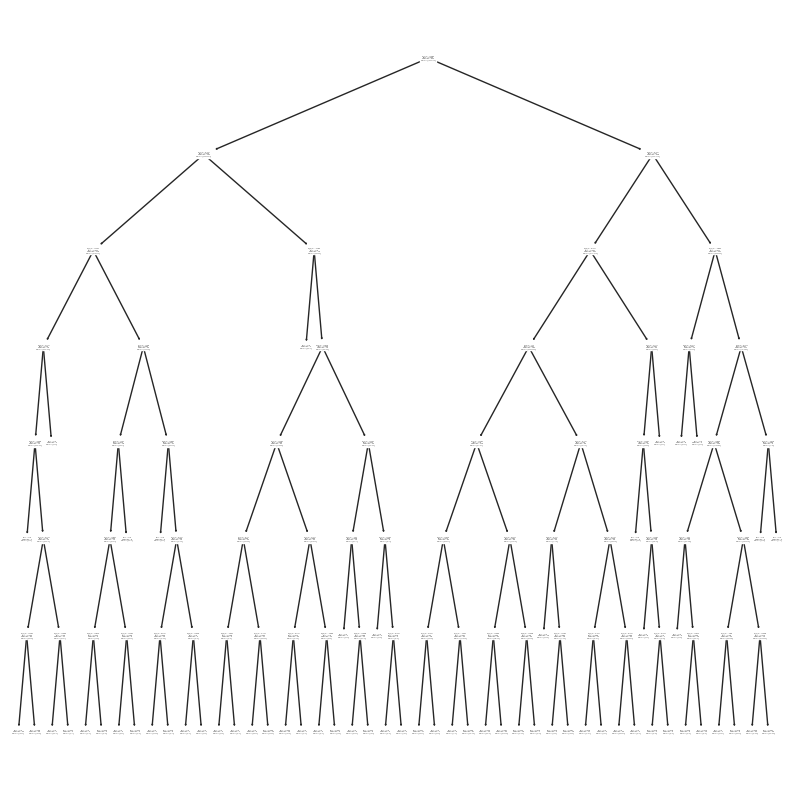

In [1118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

# Artificial Neural Network

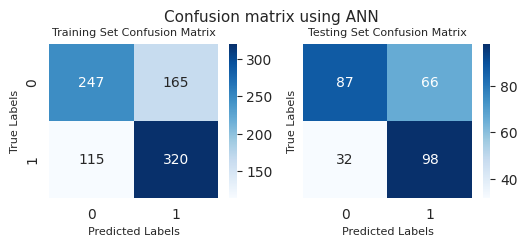

-----Results for ANN ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.669421           0.659794        0.735632    0.695652          0.65371          0.597561       0.753846   0.666667


In [1119]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)

y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)

calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_train,y_pred_train)
auc8 = metrics.roc_auc_score(y_train,y_pred_train)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)

In [1120]:
# # Compute False postive rate, and True positive rate
# fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# # Calculate Area under the curve to display on the plot
# auc8 = metrics.roc_auc_score(y_train,y_pred_train)

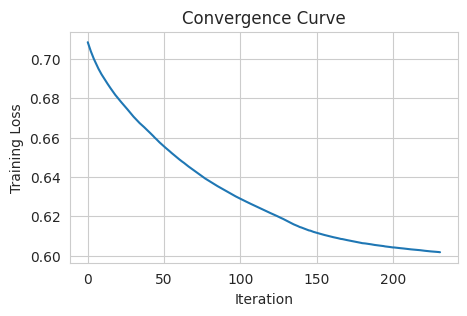

In [1121]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

fig = plt.figure(figsize=(5,3))
# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Training Loss', fontsize=10)
plt.savefig('ANN_convergence.png')
plt.show()

# Box Plot

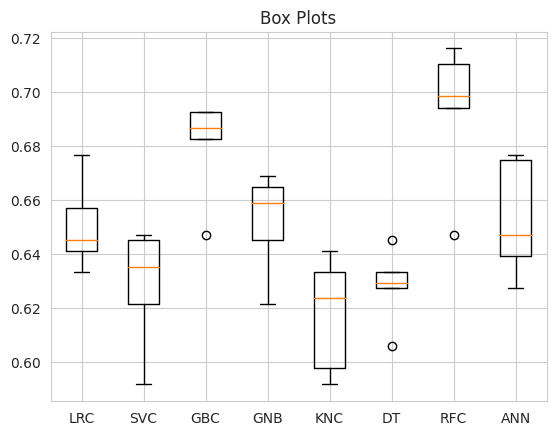

In [1122]:
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT', 'RFC', 'ANN']

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1)

# Draw the box plots
ax.boxplot(results)

# Set the labels for each box plot
ax.set_xticklabels(names)

# Add a title to the plot
ax.set_title('Box Plots')

# Show the plot
plt.show()

In [1123]:
auc1

0.6527591786630957

In [1124]:
print(selected_feature_names)

Index(['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Neck', 'MF'], dtype='object')


# ROC Curves

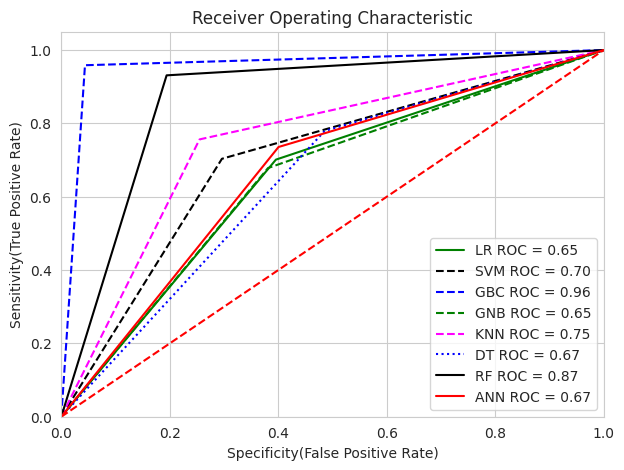

In [1125]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='-',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display